In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from scipy import interpolate


---
# VIDEO: Aliasing
---


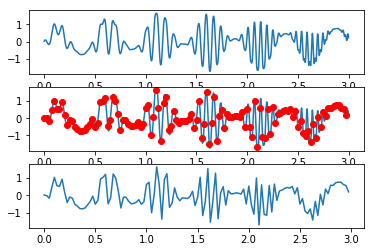

In [2]:
## code for pictures shown in slides

srate = 1000
t  = np.arange(0,3,1/srate)

sig = scipy.signal.detrend( np.multiply(1+np.sin(2*np.pi*2*t) , np.cos(np.sin(2*np.pi*5*t+np.cumsum(t/30))+t)) )

plt.subplot2grid((3,1), (0,0))
plt.plot(t,sig)

plt.subplot2grid((3,1), (1,0))
k = 25 # or 5
plt.plot(t,sig)
plt.plot(t[range(1,len(t),k)],sig[range(1,len(t),k)],'ro')

plt.subplot2grid((3,1), (2,0))
plt.plot(t[range(1,len(t),k)],sig[range(1,len(t),k)])

plt.show()

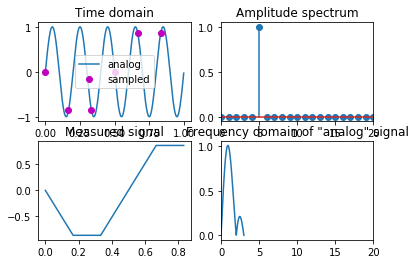

In [3]:
## also show in the lecture slides

# simulation params
srate  = 1000
time   = np.arange(0,1,1/srate)
npnts  = len(time)
signal = np.sin(2*np.pi*5*time)


# measurement parameters
msrate = 6 # hz
mtime  = np.arange(0,1,1/msrate)
midx   = np.zeros(len(mtime),dtype=int)
for i in range(0,len(midx)):
    midx[i] = np.argmin(np.abs(time-mtime[i]))


# plot the time-domain signals
plt.subplot2grid((2,2), (0,0))
plt.plot(time,signal,label='analog')
plt.plot(time[midx],signal[midx],'mo',label='sampled')
plt.title('Time domain')
plt.legend()


# plot the power spectrum of the "analog" signal
plt.subplot2grid((2,2),(0,1))
sigX = 2*np.abs(scipy.fftpack.fft(signal,npnts)/npnts)
hz   = np.linspace(0,srate/2,int(np.floor(npnts/2)+1))
plt.stem(hz,sigX[0:len(hz)])
plt.xlim([0,20])
plt.title('Amplitude spectrum')


# now plot only the measured signal
plt.subplot2grid((2,2),(1,0))
plt.plot(time[midx],signal[midx])
plt.title('Measured signal')

# and its amplitude spectrum
plt.subplot2grid((2,2),(1,1))
sigX = 2*np.abs(scipy.fftpack.fft(signal[midx],npnts)/len(midx))
hz   = np.linspace(0,msrate/2,int(np.floor(npnts/2)+1))

plt.plot(hz,sigX[0:len(hz)])
plt.xlim([0,20])
plt.title('Frequency domain of "analog" signal')
plt.show()

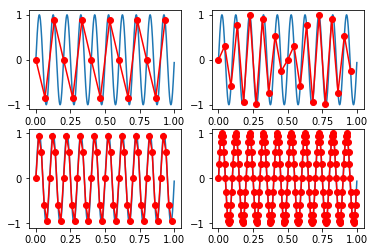

In [4]:
## Related: getting close to the Nyquist

# subsample a high-sampling rate sine wave (pretend it's a continuous wave)
srate = 1000
t = np.arange(0,1,1/srate)
f = 10 # frequency of the sine wave Hz
d = np.sin(2*np.pi*f*t)


# "Measurement" sampling rates
srates = [15, 22, 50, 200] # in Hz

for si in range(0,4):
    
    # find the right subplot
    loc = np.unravel_index(si,[2,2],'F')
    plt.subplot2grid((2,2),(loc[1],loc[0]))
    
    # plot 'continuous' sine wave
    plt.plot(t,d)
    
    # plot sampled sine wave
    samples = np.arange(0,len(t),1000/srates[si])
    samples = list( map(int,samples) )
    plt.plot(t[samples],d[samples],'ro-')

plt.show()


---
# VIDEO: Effects of non-stationarities on power spectra
---


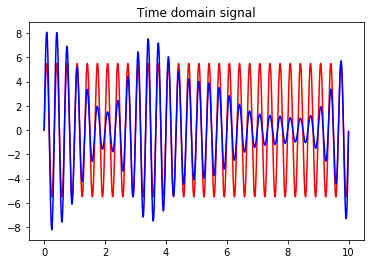

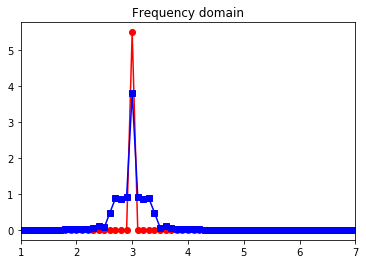

In [3]:
## amplitude non-stationarity

srate = 1000
t = np.arange(0,10,1/srate)
n = len(t)
f = 3 # frequency in Hz

# sine wave with time-increasing amplitude
ampl1 = np.linspace(1,10,n)
ampl2 = np.mean(ampl1)

# uncomment the next lines for an AM-radio-like signal
# y1 = 10*np.random.rand(10)
# fr = interpolate.interp1d(np.linspace(t[0],t[-1],10),y1,kind='cubic')
# ampl1 = np.abs(fr(t))


signal1 = np.multiply(ampl1 , np.sin(2*np.pi*f*t) )
signal2 = np.multiply(ampl2 , np.sin(2*np.pi*f*t) )


# obtain Fourier coefficients and Hz vector
signal1X = scipy.fftpack.fft(signal1)/n
signal2X = scipy.fftpack.fft(signal2)/n
hz = np.linspace(0,srate/2,int(np.floor(n/2)+1))

plt.plot(t,signal2,'r')
plt.plot(t,signal1,'b')
plt.title('Time domain signal')
plt.show()

plt.plot(hz,2*np.abs(signal2X[0:len(hz)]),'ro-')
plt.plot(hz,2*np.abs(signal1X[0:len(hz)]),'bs-')
plt.xlim([1,7])
plt.title('Frequency domain')
plt.show()

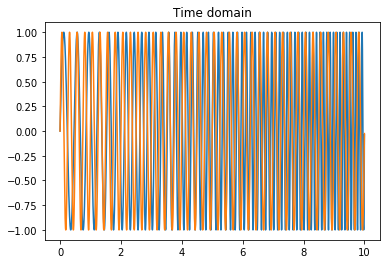

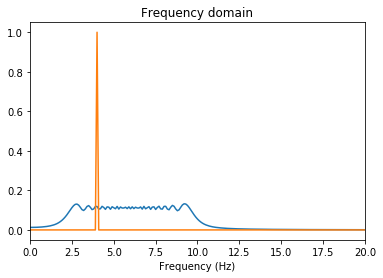

In [6]:
## Frequency nonstationarities

f  = [2, 10]
ff = np.linspace(f[0],np.mean(f),n)
signal1 = np.sin(2*np.pi*ff*t)
signal2 = np.sin(2*np.pi*np.mean(ff)*t)

# compute FFTs
signal1X = scipy.fftpack.fft(signal1)/n
signal2X = scipy.fftpack.fft(signal2)/n
hz = np.linspace(0,srate/2,int(np.floor(n/2)))

plt.plot(t,signal1)
plt.plot(t,signal2)
plt.title('Time domain')
plt.show()

plt.plot(hz,2*np.abs(signal1X[0:len(hz)]))
plt.plot(hz,2*np.abs(signal2X[0:len(hz)]))
plt.xlabel('Frequency (Hz)')
plt.title('Frequency domain')
plt.xlim([0,20])
plt.show()

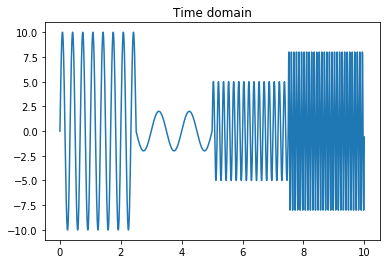

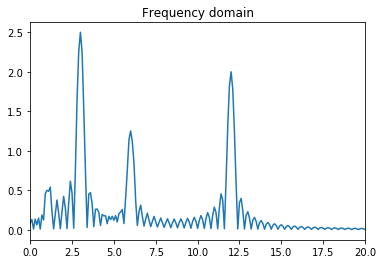

In [7]:
## sharp transitions

a = [10, 2, 5,  8]
f = [ 3, 1, 6, 12]

timechunks = np.round(np.linspace(0,n,len(a)+1))
sig1 = a[0]*np.sin(2*np.pi*f[0]*t[int(timechunks[0]):int(timechunks[1])] )
sig2 = a[1]*np.sin(2*np.pi*f[1]*t[int(timechunks[1]):int(timechunks[2])] )
sig3 = a[2]*np.sin(2*np.pi*f[2]*t[int(timechunks[2]):int(timechunks[3])] )
sig4 = a[3]*np.sin(2*np.pi*f[3]*t[int(timechunks[3]):int(timechunks[4])] )

signal = np.concatenate((sig1,sig2,sig3,sig4),axis=0)


signalX = scipy.fftpack.fft(signal)/n
hz = np.linspace(0,srate/2,int(np.floor(n/2)+1))

plt.plot(t,signal)
plt.title('Time domain')
plt.show()

plt.plot(hz,2*abs(signalX[0:len(hz)]))
plt.title('Frequency domain')
plt.xlim([0, 20])
plt.show()

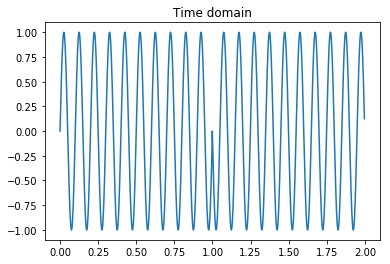

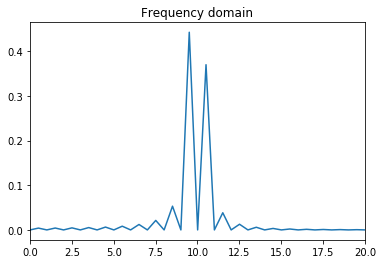

In [8]:
## phase reversal

srate = 1000
ttime = np.arange(0,1-1/srate,1/srate) # temp time, for creating half the signal
time  = np.arange(0,2-2/srate,1/srate) # signal's time vector
n = len(time)

signal = np.concatenate( (np.sin(2*np.pi*10*ttime),-np.sin(2*np.pi*10*ttime)) ,axis=0)

plt.plot(time,signal)
plt.title('Time domain')
plt.show()

# power spectrum
signalAmp = (2*np.abs( scipy.fftpack.fft(signal)/n ))**2
hz = np.linspace(0,srate/2,int(np.floor(n/2)+1))

plt.plot(hz,signalAmp[0:len(hz)])
plt.xlim([0,20])
plt.title('Frequency domain')
plt.show()

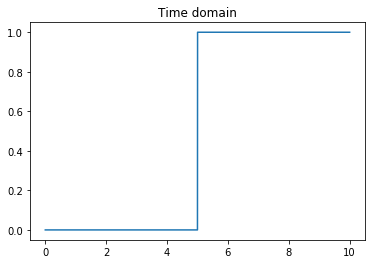

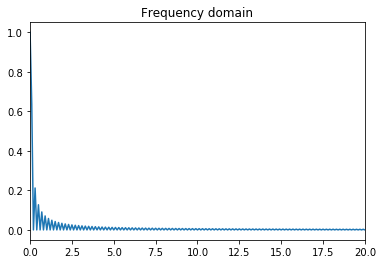

In [9]:
## edges and edge artifacts

n = len(t)
x = np.linspace(0,1,n)>.5

# uncommenting this line shows that nonstationarities 
# do not prevent stationary signals from being easily observed
#x = x + .08*np.sin(2*np.pi*6*t)

plt.plot(t,x)
plt.title('Time domain')
plt.show()

# FFT
xX = scipy.fftpack.fft(x)/n
hz = np.linspace(0,srate/2,int(np.floor(n/2)+1))

plt.plot(hz,2*np.abs(xX[0:len(hz)]))
plt.xlim([0,20])
plt.title('Frequency domain')
plt.show()


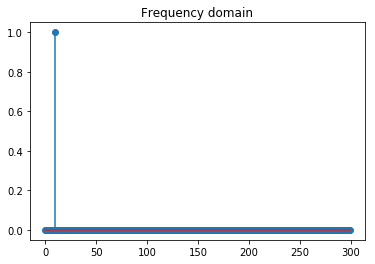

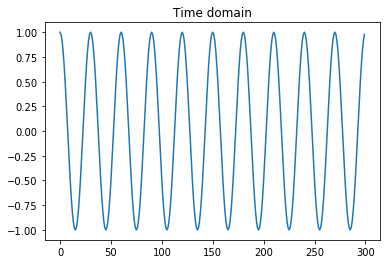

In [10]:
## spike in the frequency domain

# frequency spectrum with a spike
fspect = np.zeros(300)
fspect[10] = 1

# time-domain signal via iFFT
td_sig = np.real(scipy.fftpack.ifft(fspect)) * len(fspect)


# plot amplitude spectrum
plt.stem(fspect)
plt.title('Frequency domain')
plt.show()

# plot time domain signal
plt.plot(td_sig)
plt.title('Time domain')
plt.show()



---
# VIDEO: Solutions for non-stationary time series
---


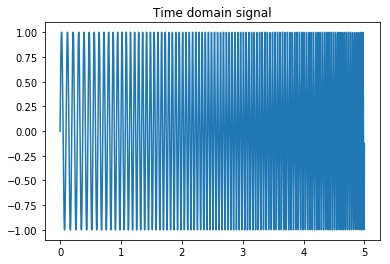

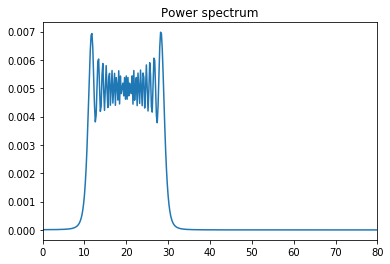

In [11]:
## create signal (chirp) used in the following examples

# simulation details and create chirp
fs     = 1000 # sampling rate
time   = np.arange(0,5,1/fs)
npnts  = len(time)
f      = [10,30] # frequencies in Hz
ff     = np.linspace(f[0],np.mean(f),npnts)
signal = np.sin(2*np.pi*ff*time)



plt.plot(time,signal)
plt.title('Time domain signal')
plt.show()

# compute power spectrum
sigpow = 2*np.abs(scipy.fftpack.fft(signal)/npnts)**2
hz     = np.linspace(0,fs/2,int(np.floor(npnts/2)+1))

plt.plot(hz,sigpow[0:len(hz)])
plt.xlim([0,80])
plt.title('Power spectrum')
plt.show()


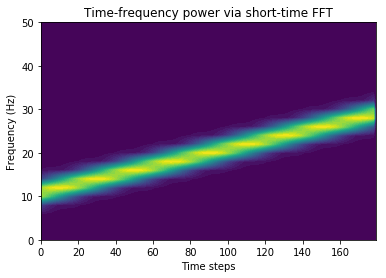

In [12]:
## short-time FFT

winlen   = 500  # window length
stepsize =  25  # step size for STFFT
numsteps = np.floor( (npnts-winlen)/stepsize )

hz = np.linspace(0,fs/2,int(np.floor(winlen/2)+1))


# initialize time-frequency matrix
tf = np.zeros( (len(hz),int(numsteps)) )

# Hann taper
hwin = .5*(1-np.cos(2*np.pi*np.linspace(0,winlen,winlen-1) / (winlen-1)))

# loop over time windows
for ti in range(0,int(numsteps)-1):
    
    # extract part of the signal
    tidx    = range(ti*stepsize+1,ti*stepsize+winlen)
    tapdata = signal[tidx]
    
    # FFT of these data
    x = scipy.fftpack.fft( np.multiply(hwin,tapdata) ) /winlen
    
    # and put in matrix
    tf[:,ti] = 2*np.abs(x[0:len(hz)])


plt.contourf(range(0,int(numsteps)),hz,tf,40)#,'linecolor','none')
plt.ylim([0,50])
plt.clim([0,.5])
plt.xlabel('Time steps')
plt.ylabel('Frequency (Hz)')
plt.title('Time-frequency power via short-time FFT')
plt.colorbar
plt.show()


In [1]:
## Morlet wavelet convolution

# frequencies used in analysis
nfrex = 30
frex  = np.linspace(2,50,nfrex)
wtime = np.arange(-2,2,1/fs)
gausS = np.linspace(5,35,nfrex)

# convolution parameters
nConv = len(wtime) + npnts - 1
halfw = np.floor(len(wtime)/2)

# initialize time-frequency output matrix
tf = np.zeros((nfrex,npnts))

# FFT of signal
signalX = scipy.fftpack.fft(signal,nConv)

# loop over wavelet frequencies
for fi in range(0,nfrex):
    
    # create the wavelet
    s   = ( gausS[fi]/(2*np.pi*frex[fi]) )**2
    cmw = np.multiply( np.exp(1j*2*np.pi*frex[fi]*wtime) , np.exp( (-wtime**2)/s ) )
    
    # compute its Fourier spectrum and normalize
    cmwX = scipy.fftpack.fft(cmw,nConv)
    cmwX = cmwX/max(cmwX); # scale to 1
  
    # convolution result is inverse FFT of pointwise multiplication of spectra
    convres  = scipy.fftpack.ifft( np.multiply( signalX,cmwX ) )
    tf[fi,:] = 2*np.abs(convres[range(int(halfw+1),int(len(convres)-halfw+2))])

plt.contourf(time,frex,tf,40)
#set(gca,'ylim',[0 50],'xlim',[0 5],'clim',[0 1])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Time-frequency power via complex Morlet wavelet convolution')
plt.show()

NameError: name 'np' is not defined


---
# Windowing and Welch's method
---


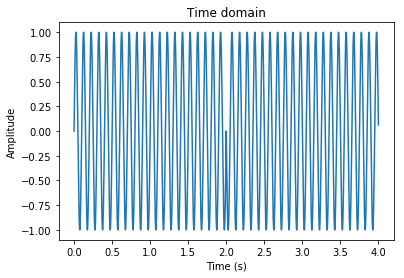

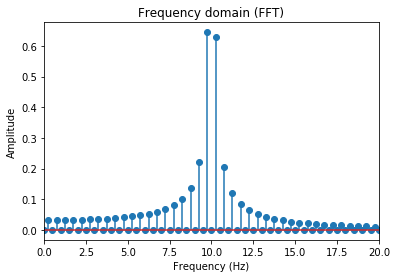

In [35]:
# create signal
srate = 1000
npnts = 2000 # actually, this times 2!
time  = np.arange(0,npnts*2)/srate
freq  = 10 # Hz

# create signal (each part separately)
sigP1  = np.sin(2*np.pi*freq*time[0:npnts])
sigP2  = np.sin(2*np.pi*freq*time[0:npnts] + np.pi)
signal = np.concatenate((sigP1,sigP2),axis=0)

# compute its amplitude spectrum
hz = np.linspace(0,srate/2,num=int(np.floor(len(time)/2)+1))
ampspect = np.abs(scipy.fft(signal)/len(time))
ampspect = 2*ampspect[0:len(hz)]


# plot the time-domain signal
plt.plot(time,signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.show()

# plot the frequency domain signal
plt.stem(hz,ampspect)
plt.xlim(0,freq*2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain (FFT)')
plt.show()

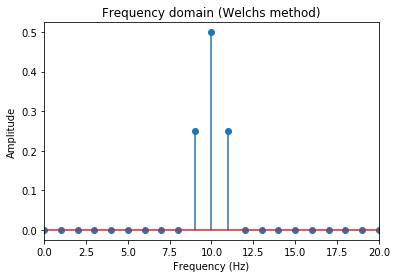

In [52]:
## Now for Welch's method

# parameters
winlen = 1000 # window length in points (not ms!)
nbins  = np.floor(len(time)/winlen)

# vector of frequencies for the small windows
hzL = np.linspace(0,srate/2,int(np.floor(winlen/2)+1))

# initialize time-frequency matrix
welchspect = np.zeros(len(hzL))

# Hann taper
hwin = .5*(1-np.cos(2*np.pi*(np.arange(0,winlen)) / (winlen-1)))

# loop over time windows
for ti in range(0,int(nbins)):
    
    # extract part of the signal
    tidx    = range( (ti-1)*winlen+1 , ti*winlen+1 )
    tmpdata = signal[tidx]
    
    # FFT of these data (does the taper help?)
    x = scipy.fft(hwin*tmpdata)/winlen
    
    # and put in matrix
    welchspect = welchspect + 2*np.abs(x[0:len(hzL)])

# divide by nbins to complete average
welchspect = welchspect/nbins


# and plot
plt.stem(hzL,welchspect)
plt.xlim(0,freq*2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain (Welch''s method)')
plt.show()


---
# Instantaneous frequency
---


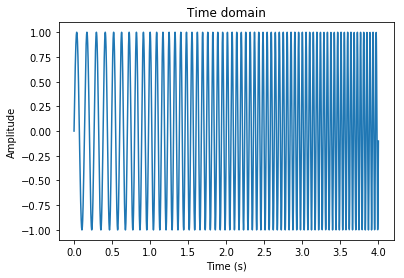

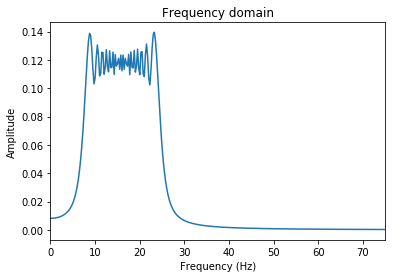

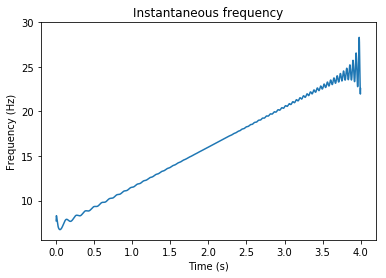

In [79]:

# simulation details
srate = 1000
time  = np.arange(0,4,1/srate)
pnts  = len(time)

# frequencies for Fourier transform
hz = np.linspace(0,srate/2,int(np.floor(pnts/2)-1))


# frequency range for linear chirp
f  = [7,25]

# generate chirp signal
ff = np.linspace(f[0],np.mean(f),pnts)
signal = np.sin(2*np.pi*ff*time)

# compute instantaneous frequency
angels = np.angle(scipy.signal.hilbert(signal))
instfreq = np.diff(scipy.unwrap(angels)) / (2*np.pi/srate)

# time-domain signal
plt.plot(time,signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.show()

# frequency domain ("static" power spectrum)
amp = 2*np.abs(scipy.fft(signal)/pnts)
plt.plot(hz,amp[:len(hz)])
plt.title('Frequency domain')
plt.xlim(0,np.minimum(srate/2,f[1]*3))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# now show instantaneous frequency
plt.plot(time[:-1],instfreq)
plt.ylim(f[0]*.8,f[1]*1.2)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Instantaneous frequency')
plt.show()
